In [5]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
#Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [6]:
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
#Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=50)
#n_estimators creates 100 decision tress
#random_state controls the randomness of the model

In [8]:
#Apply K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

In [10]:
#Display Cross Validation results
print("K-Fold Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))

K-Fold Cross-Validation Scores: [0.94736842 0.96491228 0.94736842 0.96491228 0.98230088]
Average Accuracy: 0.9613724576929048


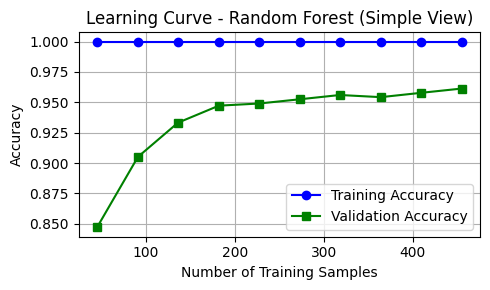

In [14]:
#Plotting the leaning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y,cv=kf,scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(5, 3))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green', marker='s')
plt.title('Learning Curve - Random Forest (Simple View)')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
